### Explicación breve

Ejercicio 6 - diferencia entre localización de objetos y clasificación de imágenes

Para empezar podemos decir que la clasificación de imágenes toma una imagen completa e intenta asignarle una etiqueta, por ejemplo podríamos pasarle la imagen de un perr y asignarle la etiqueta "perro" distinguiendolo de algún otro animal, o quizá con un algoritmo más avanzado detectando diferencias más precisas y diferenciar una raza de perro de otra.

En cambio en localización de objetos, lo que buscamos es tomar una imagen y en ella detectar objetos varios, marcarlos con un bounding box, y etiquetarlos en lo posible si son de nuestro interés. Es decir encuentra la ubicación de distintos objetos en una imagen.

### Clasificación de imágenes

In [7]:
# Requisitos:
#!pip install tensorflow pillow

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

# Cargar el modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # Cargar y preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Tamaño de entrada para EfficientNetB0

    # Convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realizar la predicción con el modelo
    predictions = model.predict(img_array)

    # Decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]

# Prueba con una imagen local
img_path = 'caja.jpeg'  # Reemplaza con la ruta de tu imagen
predictions = classify_image(img_path)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 2s 2s/step


1: packet (0.21)
2: handkerchief (0.10)
3: rubber_eraser (0.10)


Acá yo usé una caja de perfume, se ve que le costó reconocer lo que era así que voy a intentar con una pelota de tenis.

In [3]:
img_path = 'pelota.jpg'  # Reemplaza con la ruta de tu imagen
predictions = classify_image(img_path)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 0s 78ms/step


1: tennis_ball (0.87)
2: racket (0.01)
3: croquet_ball (0.01)


Acá vemos que las etiquetas muestran un 0.87 de probabilidad de que sea una pelota de tenis, 0.01 de raqueta, y 0.01 de que sea una pelota de criquet.

### Localización de objetos

In [10]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many


0: 640x480 1 bed, 198.0ms
Speed: 6.4ms preprocess, 198.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


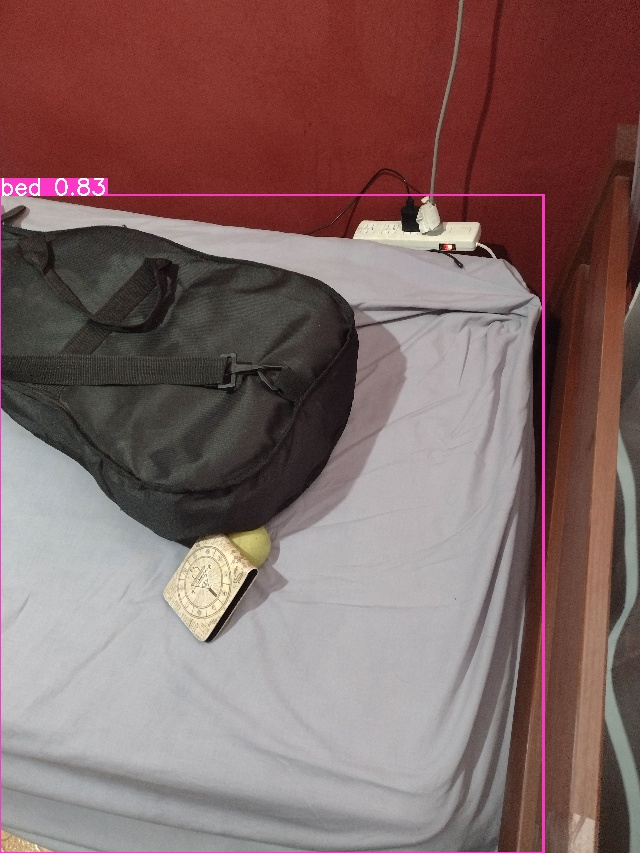

In [15]:
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # Esto descargará automáticamente los pesos del modelo

# Realizar la inferencia
source_img = cv2.imread('pelota_escondida.jpg')
results = model(source_img)

# Visualizar los resultados en el marco
annotated_frame = results[0].plot()

# Dimensiones deseadas de la imagen de salida (ajusta según sea necesario)
desired_width = 640  # Anchura deseada de la imagen de salida
original_height, original_width, _ = annotated_frame.shape
desired_height = int(original_height * desired_width / original_width)

# Redimensionar la imagen de salida de manera proporcional
resized_frame = cv2.resize(annotated_frame, (desired_width, desired_height))

# Guardar el resultado en JPG
cv2.imwrite('pelota_tenis.jpg', resized_frame)

# Mostrar el resultado en Colab
Image('pelota_tenis.jpg')



0: 640x480 1 sports ball, 1 bed, 162.8ms
Speed: 7.3ms preprocess, 162.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


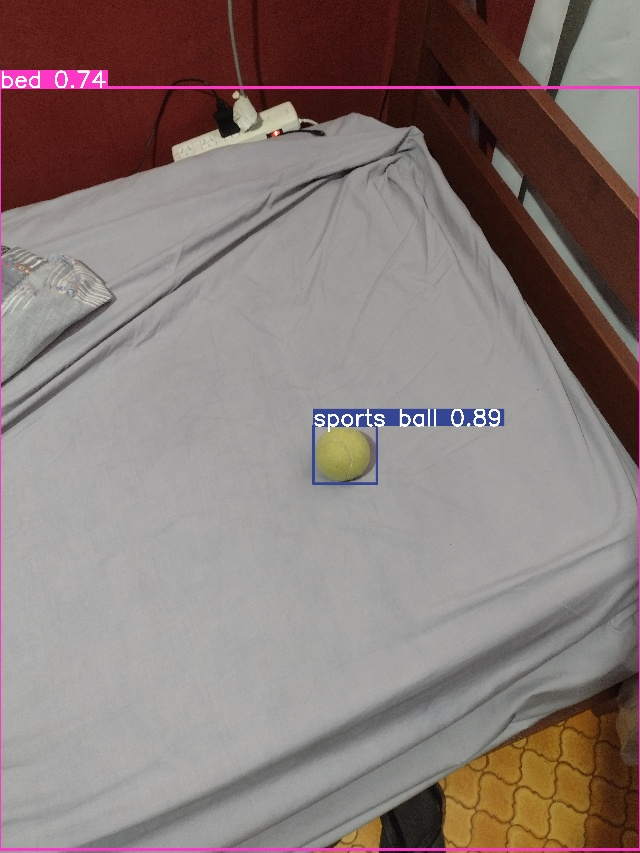

In [16]:
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # Esto descargará automáticamente los pesos del modelo

# Realizar la inferencia
source_img = cv2.imread('pelota_lejos.jpg')
results = model(source_img)

# Visualizar los resultados en el marco
annotated_frame = results[0].plot()

# Dimensiones deseadas de la imagen de salida (ajusta según sea necesario)
desired_width = 640  # Anchura deseada de la imagen de salida
original_height, original_width, _ = annotated_frame.shape
desired_height = int(original_height * desired_width / original_width)

# Redimensionar la imagen de salida de manera proporcional
resized_frame = cv2.resize(annotated_frame, (desired_width, desired_height))

# Guardar el resultado en JPG
cv2.imwrite('pelota_tenis2.jpg', resized_frame)

# Mostrar el resultado en Colab
Image('pelota_tenis2.jpg')



0: 640x480 1 cup, 1 knife, 1 spoon, 1 bowl, 1 dining table, 1 remote, 1 keyboard, 196.7ms
Speed: 6.3ms preprocess, 196.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


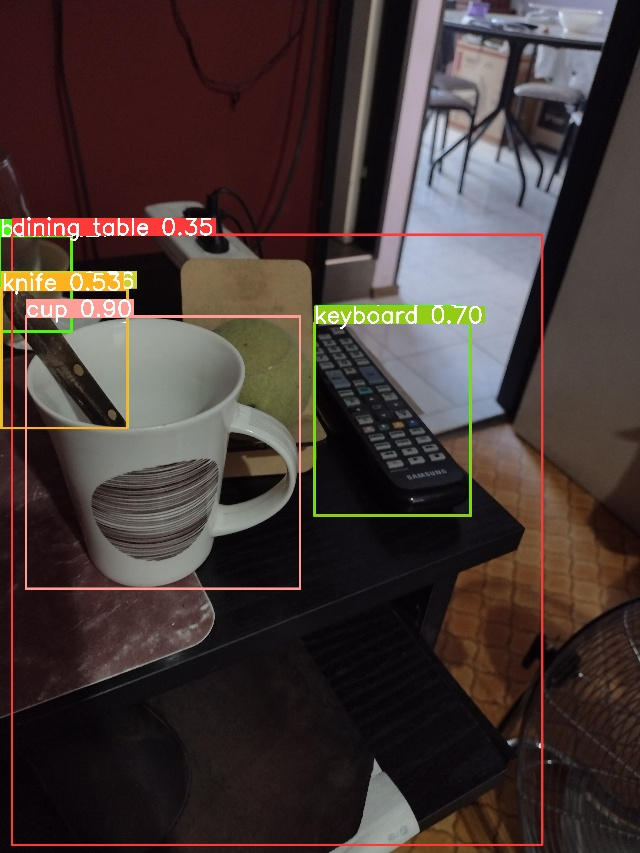

In [17]:
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # Esto descargará automáticamente los pesos del modelo

# Realizar la inferencia
source_img = cv2.imread('pelota_objetos.jpg')
results = model(source_img)

# Visualizar los resultados en el marco
annotated_frame = results[0].plot()

# Dimensiones deseadas de la imagen de salida (ajusta según sea necesario)
desired_width = 640  # Anchura deseada de la imagen de salida
original_height, original_width, _ = annotated_frame.shape
desired_height = int(original_height * desired_width / original_width)

# Redimensionar la imagen de salida de manera proporcional
resized_frame = cv2.resize(annotated_frame, (desired_width, desired_height))

# Guardar el resultado en JPG
cv2.imwrite('pelota_tenis3.jpg', resized_frame)

# Mostrar el resultado en Colab
Image('pelota_tenis3.jpg')


En estos experimentos que realice con distintas fotos vemos que en la última y en la primera no detecta la pelota de tenis, no entiendo bien por qué, pero parece ser que solo la detecta cuando no está oculta para nada, como en el segundo ejemplo.